In [ ]:
## Gabriella Pinheiro

## Análise Livre
Como exercício final, cada grupo deve realizar uma análise própria.

Sugestões:
- Comparar salários e notas entre departamentos;
- Investigar disparidades de gênero dentro de cada departamento.

No mínimo o grupo deverá entregar um Jupyter notebook contendo um gráfico box-plot, uma tabela e uma análises com médias e desvios-padrões.

In [2]:
import pandas as pd    
import matplotlib.pyplot as plt    
import seaborn as sns    
%matplotlib inline    


In [ ]:
# Lê arquivo Excel e apresenta as 5 primeiras linhas

df = pd.read_excel('Cia_Eletronicos.xlsx', sheet_name='Dados')
df.head()

,ID,Ultimo_Nome,Primeiro_Nome,Sexo,Idade,Departamento,Tempo_Empresa,Salario_Anual,Nota
0,1075,Dickens,Jimmy,M,60,A,42,74500.000000,7.4
1,1161,Anderson,James,M,61,B,41,73397.397499,9.0
2,1311,Long,Peggy,F,57,A,39,71668.997726,6.0
3,1506,Gebhardt,Virginia,F,57,B,37,69433.997726,8.8
4,1543,Ammann,Ray,M,60,A,37,70775.000000,4.8


In [ ]:
# Estatísticas descritivas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             155 non-null    int64  
 1   Ultimo_Nome    155 non-null    object 
 2   Primeiro_Nome  155 non-null    object 
 3   Sexo           155 non-null    object 
 4   Idade          155 non-null    int64  
 5   Departamento   155 non-null    object 
 6   Tempo_Empresa  155 non-null    int64  
 7   Salario_Anual  155 non-null    float64
 8   Nota           155 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 11.0+ KB


,ID,Idade,Tempo_Empresa,Salario_Anual,Nota
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,4153.083871,40.283871,11.122581,53663.840032,6.373548
std,999.598997,11.848478,9.778943,6527.135161,1.598663
min,1075.000000,19.000000,1.000000,44700.000000,3.300000
25%,3595.500000,31.000000,3.000000,48782.599659,5.000000
50%,4439.000000,40.000000,8.000000,51643.399773,6.400000
75%,4971.000000,50.000000,16.500000,57066.998863,7.500000
max,5298.000000,62.000000,42.000000,74500.000000,10.000000


In [47]:
# Análise de tempo de empresa
# Primeiro, vamos verificar os dados da coluna 'Tempo_Empresa'

tempo_describe = df['Tempo_Empresa'].describe()
print(tempo_describe)


# Transformando em variável categórica - faixa de tempo de empresa
# Vamos criar uma função para classificar o tempo de empresa em faixas
def classificar_tempo(anos):
    if anos <= 3:
        return '1-3 anos'
    elif anos <= 7:
        return '4-7 anos'
    elif anos <= 12:
        return '8-12 anos'
    elif anos <= 20:
        return '13-20 anos'
    else:
        return '21+ anos'

df['Faixa_Tempo_Empresa'] = df['Tempo_Empresa'].apply(classificar_tempo)

df.head()

count    155.000000
mean      11.122581
std        9.778943
min        1.000000
25%        3.000000
50%        8.000000
75%       16.500000
max       42.000000
Name: Tempo_Empresa, dtype: float64


,ID,Ultimo_Nome,Primeiro_Nome,Sexo,Idade,Departamento,Tempo_Empresa,Salario_Anual,Nota,Faixa_Tempo_Empresa,faixa_tempo_empresa
0,1075,Dickens,Jimmy,M,60,A,42,74500.000000,7.4,21+ anos,21+ anos
1,1161,Anderson,James,M,61,B,41,73397.397499,9.0,21+ anos,21+ anos
2,1311,Long,Peggy,F,57,A,39,71668.997726,6.0,21+ anos,21+ anos
3,1506,Gebhardt,Virginia,F,57,B,37,69433.997726,8.8,21+ anos,21+ anos
4,1543,Ammann,Ray,M,60,A,37,70775.000000,4.8,21+ anos,21+ anos


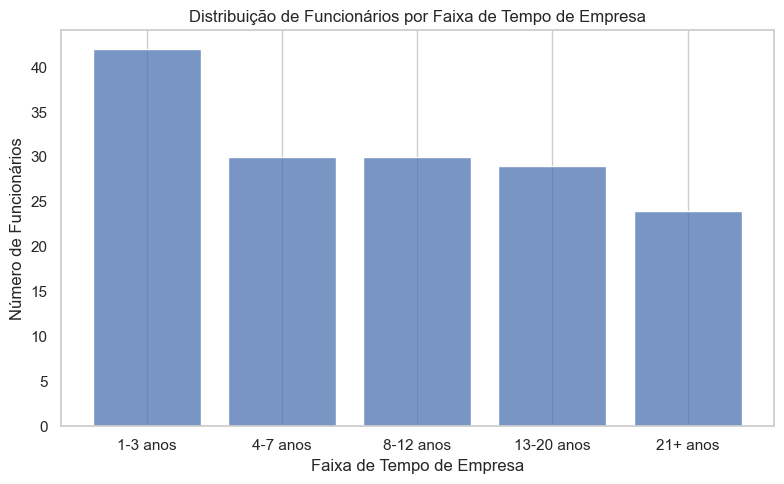

In [ ]:
# Histograma de distribuição de funcionários por faixa de tempo de empresa

# Garantir a ordem correta usando Categorical
df['Faixa_Tempo_Empresa'] = pd.Categorical(
    df['Faixa_Tempo_Empresa'],
    categories=['1-3 anos', '4-7 anos', '8-12 anos', '13-20 anos', '21+ anos'],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Faixa_Tempo_Empresa',
    discrete=True,
    shrink=0.8
)

plt.title('Distribuição de Funcionários por Faixa de Tempo de Empresa')
plt.xlabel('Faixa de Tempo de Empresa')
plt.ylabel('Número de Funcionários')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [ ]:
# Tabela: média e dp de salário por faixa de tempo de empresa

ordem_faixas = ['1-3 anos', '4-7 anos', '8-12 anos', '13-20 anos', '21+ anos']

df.groupby('Faixa_Tempo_Empresa')['Salario_Anual']\
  .agg(Salario_Medio='mean', Desvio_Padrao='std')\
  .reindex(index=ordem_faixas)\
  .round(2)

#A análise indica que a empresa recompensa a longevidade com aumentos salariais relevantes, especialmente no longo prazo. 
#No entanto, a variabilidade salarial entre os mais antigos sugere que pode haver diferenças significativas de função ou performance


,Salario_Medio,Desvio_Padrao
Faixa_Tempo_Empresa,,
1-3 anos,47425.28,1054.37
4-7 anos,50174.26,739.58
8-12 anos,52777.79,1207.06
13-20 anos,57190.31,1461.84
21+ anos,65789.71,4589.17


In [54]:
# Probabilidade de ter um funcionário com 21+ anos de empresa e ser do sexo feminino (total)

total_funcionarios = df.shape[0]
total_funcionarios_21_anos = df[df['Faixa_Tempo_Empresa'] == '21+ anos'].shape[0]
probabilidade_21_anos = total_funcionarios_21_anos / total_funcionarios
print(f"Probabilidade de um funcionário ter 21+ anos de empresa: {probabilidade_21_anos:.3f}")


# Probabilidade de, dentro do grupo de 21+ anos de empresa, ser do sexo feminino
total_21_anos = df[df['Faixa_Tempo_Empresa'] == '21+ anos'].shape[0]
total_21_anos_feminino = df[(df['Faixa_Tempo_Empresa'] == '21+ anos') & (df['Sexo'] == 'F')].shape[0]
probabilidade_feminino_dado_21_anos = total_21_anos_feminino / total_21_anos

print(f"Probabilidade de ser do sexo feminino dentro da faixa 21+ anos: {probabilidade_feminino_dado_21_anos:.3f}")



Probabilidade de um funcionário ter 21+ anos de empresa: 0.155
Probabilidade de ser do sexo feminino dentro da faixa 21+ anos: 0.667


In [55]:
# Tabela de proporção por faixa e sexo
tabela_proporcao = pd.crosstab(
    df['Faixa_Tempo_Empresa'],
    df['Sexo'],
    normalize='index'  # normaliza por linha (faixa)
).round(3)

# Renomeia colunas para deixar claro que são proporções
tabela_proporcao.columns.name = None
tabela_proporcao = tabela_proporcao.rename(columns={'F': 'Proporção Feminino', 'M': 'Proporção Masculino'})

# Ordena pelas faixas desejadas (caso necessário)
ordem_faixas = ['1-3 anos', '4-7 anos', '8-12 anos', '13-20 anos', '21+ anos']
tabela_proporcao = tabela_proporcao.reindex(index=ordem_faixas)

print(tabela_proporcao)


                     Proporção Feminino  Proporção Masculino
Faixa_Tempo_Empresa                                         
1-3 anos                          0.571                0.429
4-7 anos                          0.633                0.367
8-12 anos                         0.400                0.600
13-20 anos                        0.621                0.379
21+ anos                          0.667                0.333


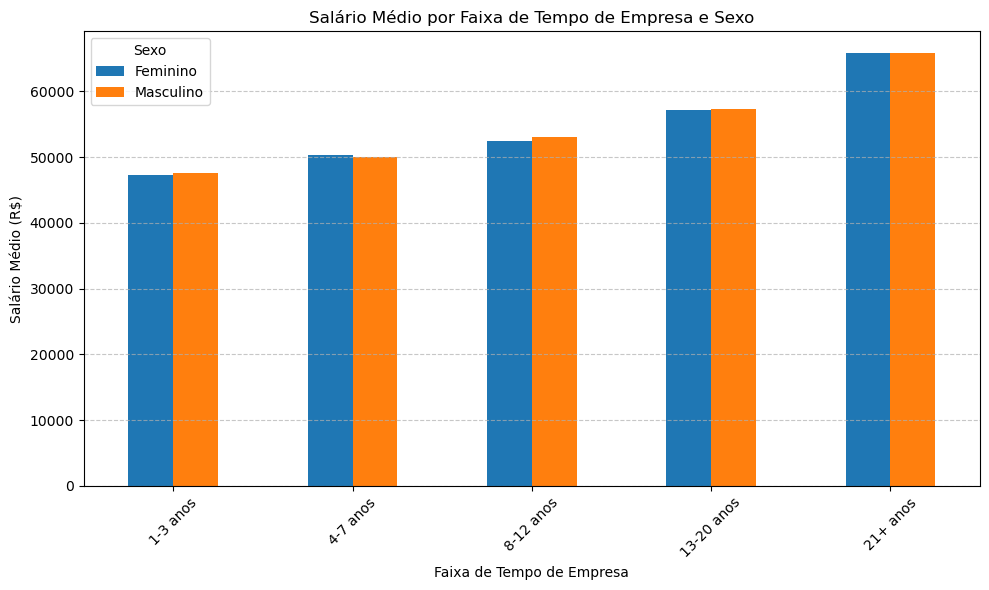

In [45]:
import matplotlib.pyplot as plt

# Dados já organizados na tabela
salario_medio_por_grupo = df.pivot_table(
    index='Faixa_Tempo_Empresa',
    columns='Sexo',
    values='Salario_Anual',
    aggfunc='mean'
).round(2)

# Renomeando as colunas para visualização
salario_medio_por_grupo = salario_medio_por_grupo.rename(columns={'F': 'Feminino', 'M': 'Masculino'})

# Ordena pela ordem desejada
ordem_faixas = ['1-3 anos', '4-7 anos', '8-12 anos', '13-20 anos', '21+ anos']
salario_medio_por_grupo = salario_medio_por_grupo.reindex(index=ordem_faixas)

# Plotando o gráfico
salario_medio_por_grupo.plot(kind='bar', figsize=(10, 6))
plt.title('Salário Médio por Faixa de Tempo de Empresa e Sexo')
plt.xlabel('Faixa de Tempo de Empresa')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


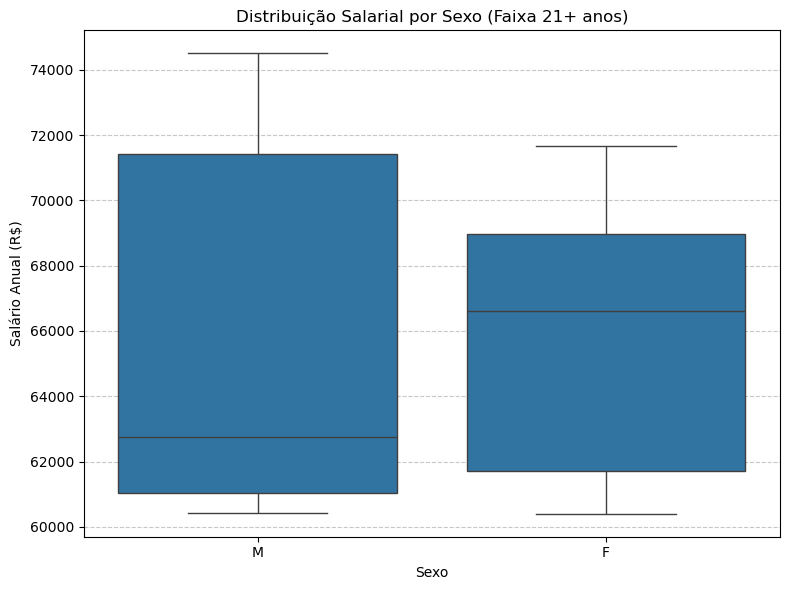

In [46]:
# Filtrar apenas a faixa "21+ anos"
df_21mais = df[df['Faixa_Tempo_Empresa'] == '21+ anos']

# Criar o boxplot com seaborn (salário anual por sexo na faixa 21+ anos)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_21mais, x='Sexo', y='Salario_Anual')
plt.title('Distribuição Salarial por Sexo (Faixa 21+ anos)')
plt.xlabel('Sexo')
plt.ylabel('Salário Anual (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Na faixa de funcionários com mais de 21 anos de empresa, a mediana salarial das mulheres é superior à dos homens, indicando que, 
# de forma geral, elas recebem salários mais consistentes e ligeiramente mais altos. Embora os homens apresentem maior variação nos 
# salários — com valores extremos mais altos —, a distribuição feminina é mais concentrada e menos desigual. Isso sugere que, nessa 
# faixa de tempo de casa, as mulheres não apenas possuem remuneração mais equilibrada entre si, mas também superam os homens na média 
# salarial, contrariando padrões comuns do mercado.

